In [1]:
import os

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.5)
mpl.rcParams["text.usetex"] = True
mpl.rcParams["mathtext.fontset"] = 'cm'
mpl.rcParams['font.family'] = ['sans-serif']

In [2]:
if not os.path.exists('../figures'):
    os.makedirs('../figures')

In [3]:
log_baseline = pd.read_csv('../outputs/log_baseline.csv')
log_cvx = pd.read_csv('../outputs/log_cvx.csv')
log_cvx_truc5 = pd.read_csv('../outputs/log_cvx_truc5.csv')
log_direct = pd.read_csv('../outputs/log_direct.csv')
log_mc = pd.read_csv('../outputs/log_mc.csv')

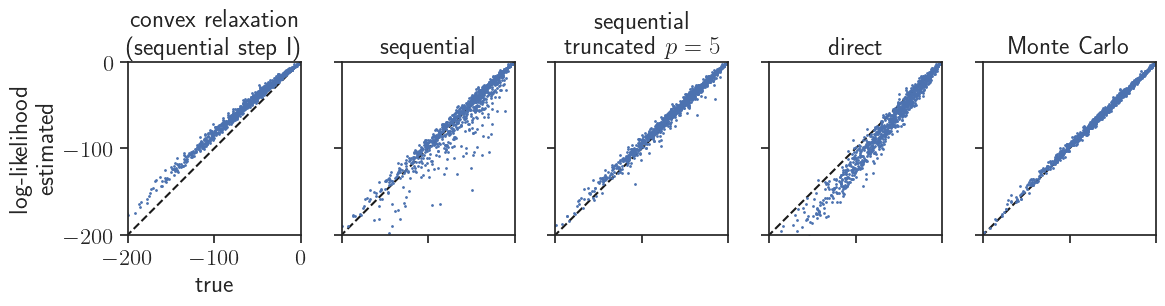

In [4]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))

axs[0].plot(log_baseline['ll'], log_cvx['s1_ll'], linestyle='none', marker='.', markersize=2)
axs[1].plot(log_baseline['ll'], log_cvx['ll'], linestyle='none', marker='.', markersize=2)
axs[2].plot(log_baseline['ll'], log_cvx_truc5['ll'], linestyle='none', marker='.', markersize=2)
axs[3].plot(log_baseline['ll'], log_direct['ll'], linestyle='none', marker='.', markersize=2)
axs[4].plot(log_baseline['ll'], log_mc['ll'], linestyle='none', marker='.', markersize=2)

for ax in axs:
    ax.set_aspect('equal', 'box')
    ax.plot((-300, 0), (-300, 0), color='k', linestyle='dashed', zorder=-1)
    ax.set_xlim(-200, 0)
    ax.set_ylim(-200, 0)
    ax.set_xticks(np.arange(-200, 1, 100))
    ax.set_yticks(np.arange(-200, 1, 100))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
axs[0].set_xticklabels([f'${l}$' for l in np.arange(-200, 1, 100)])
axs[0].set_yticklabels([f'${l}$' for l in np.arange(-200, 1, 100)])
axs[0].set_xlabel('true')
axs[0].set_ylabel('log-likelihood\nestimated')

axs[0].set_title('convex relaxation\n(sequential step I)')
axs[1].set_title('sequential')
axs[2].set_title('sequential\ntruncated $p = 5$')
axs[3].set_title('direct')
axs[4].set_title('Monte Carlo')

plt.tight_layout()
fig.savefig('../figures/exp2.pdf', bbox_inches='tight')

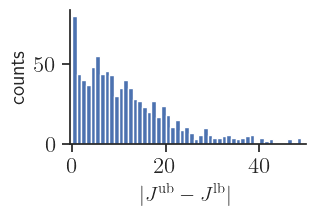

In [5]:
bd_gaps = np.abs(log_cvx['s1_ll'] - log_cvx['ll'])

fig, axs = plt.subplots(1, 1, figsize=(3.5, 2.5))

counts, bins, _ = axs.hist(bd_gaps, bins=50, range=(0, 50))

axs.set_xlabel(r"$|J^{\rm ub} - J^{\rm lb}|$",  fontsize=15)
axs.set_ylabel("counts", fontsize=15)

axs.set_xlim(-0.5, 50)

sns.despine()
plt.tight_layout()
fig.savefig('../figures/exp2_bd_gap.pdf', bbox_inches='tight')

In [6]:
cvx_s1_ts = log_cvx['s1_time']
cvx_s2_ts = log_cvx['s2_time']
cvx_truc5_s1_ts = log_cvx_truc5['s1_time']
cvx_truc5_s2_ts = log_cvx_truc5['s2_time']
direct_ts = log_direct['time']
mc_ts = log_mc['time']

print(f"sequential s1: {np.round(np.mean(cvx_s1_ts), 2)} pm {np.round(np.std(cvx_s1_ts) / np.sqrt(len(cvx_s1_ts)), 2)}")
print(f"sequential s2: {np.round(np.mean(cvx_s2_ts), 2)} pm {np.round(np.std(cvx_s2_ts) / np.sqrt(len(cvx_s2_ts)), 2)}")
print(f"sequential truncated s1: {np.round(np.mean(cvx_truc5_s1_ts), 2)} pm {np.round(np.std(cvx_truc5_s1_ts) / np.sqrt(len(cvx_truc5_s1_ts)), 2)}")
print(f"sequential truncated s2: {np.round(np.mean(cvx_truc5_s2_ts), 2)} pm {np.round(np.std(cvx_truc5_s2_ts) / np.sqrt(len(cvx_truc5_s2_ts)), 2)}")
print(f"direct: {np.round(np.mean(direct_ts), 2)} pm {np.round(np.std(direct_ts) / np.sqrt(len(direct_ts)), 2)}")
print(f"monte carlo: {np.round(np.mean(mc_ts), 2)} pm {np.round(np.std(mc_ts) / np.sqrt(len(mc_ts)), 2)}")

sequential s1: 0.83 pm 0.03
sequential s2: 8.42 pm 0.07
sequential truncated s1: 0.04 pm 0.0
sequential truncated s2: 1.53 pm 0.02
direct: 8.9 pm 0.01
monte carlo: 17.33 pm 0.09


In [7]:
cvx_ts = (log_cvx['s1_time'] + log_cvx['s2_time'])
cvx_truc5_ts = (log_cvx_truc5['s1_time'] + log_cvx_truc5['s2_time'])
direct_ts = log_direct['time']
mc_ts = log_mc['time']

print(f"sequential: {np.round(np.mean(cvx_ts), 2)} pm {np.round(np.std(cvx_ts) / np.sqrt(len(cvx_ts)), 2)}")
print(f"sequential truncated: {np.round(np.mean(cvx_truc5_ts), 2)} pm {np.round(np.std(cvx_truc5_ts) / np.sqrt(len(cvx_truc5_ts)), 2)}")
print(f"direct: {np.round(np.mean(direct_ts), 2)} pm {np.round(np.std(direct_ts) / np.sqrt(len(direct_ts)), 2)}")
print(f"monte carlo: {np.round(np.mean(mc_ts), 2)} pm {np.round(np.std(mc_ts) / np.sqrt(len(mc_ts)), 2)}")

sequential: 9.25 pm 0.06
sequential truncated: 1.57 pm 0.02
direct: 8.9 pm 0.01
monte carlo: 17.33 pm 0.09
